<a href="https://colab.research.google.com/github/toche7/MDS/blob/main/DemogAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Demographic Data Analysis

Load Data

In [ ]:
from google.colab import files

In [ ]:
data_to_load = files.upload()

Saving Data10_Student.csv to Data10_Student.csv
Saving DemograhicData.csv to DemograhicData.csv


In [ ]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(data_to_load['DemograhicData.csv']))


In [ ]:
df.head()

,Gender,Age,Weight,Height
0,F,25,39.0,156
1,M,40,73.0,178
2,F,28,60.0,148
3,F,27,53.7,158
4,M,24,57.0,166


# Data Visualization 

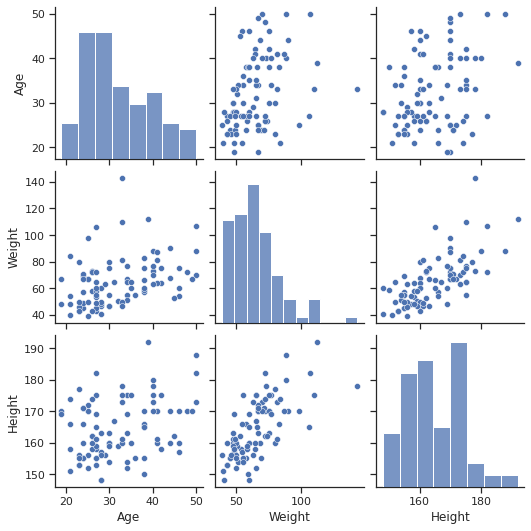

In [ ]:
import seaborn as sns
sns.set_theme(style = 'ticks')
sns.pairplot(df)

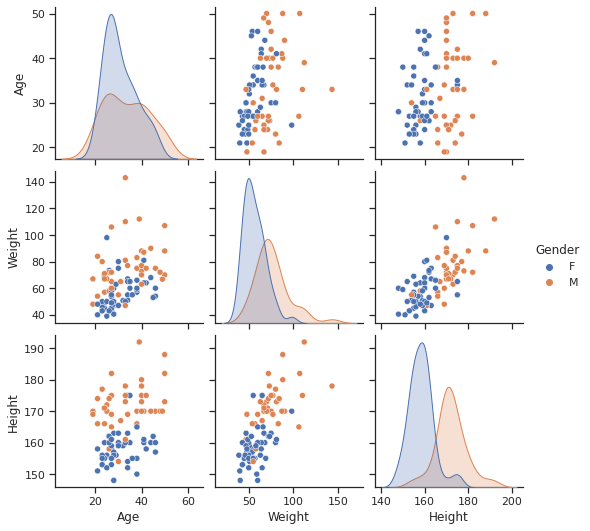

In [ ]:
sns.pairplot(df, hue ='Gender')

#Regession Model

0. Load Libraries
1. Load data
2. แยกข้อมูล Input, X และข้อมูล output, y, label, แยกตาม Column 
3. Splite train set , test set
4. Train Model
5. Evaluate Model
6. Plot graph 

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
generalAttrs = ['Height']
X = df[generalAttrs]
y = df.Weight

In [ ]:
X.head()

,Height
0,156
1,178
2,148
3,158
4,166


In [ ]:
y.head()

0    39.0
1    73.0
2    60.0
3    53.7
4    57.0
Name: Weight, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 1 )

In [ ]:
y_test.size

28

In [ ]:
y_train.size

63

In [ ]:
y.size

91

In [ ]:
model = linear_model.LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
per = mean_squared_error(y_test,y_pred)

In [ ]:
rms = math.sqrt(per)

In [ ]:
rms

18.52600500397287

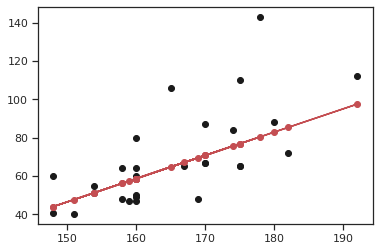

In [ ]:
plt.scatter(X_test, y_test, color ='k')
plt.plot(X_test,y_pred,'-or')

# Decision Tree Model

In [ ]:
from  sklearn import tree
from  sklearn.model_selection import train_test_split
from  sklearn import metrics


In [ ]:
generalAttrs = ['Age', 'Height', 'Weight']
X = df[generalAttrs]
y = df.Gender

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 1)

In [ ]:
model = tree.DecisionTreeClassifier( criterion='entropy')

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test,y_pred)

0.8214285714285714

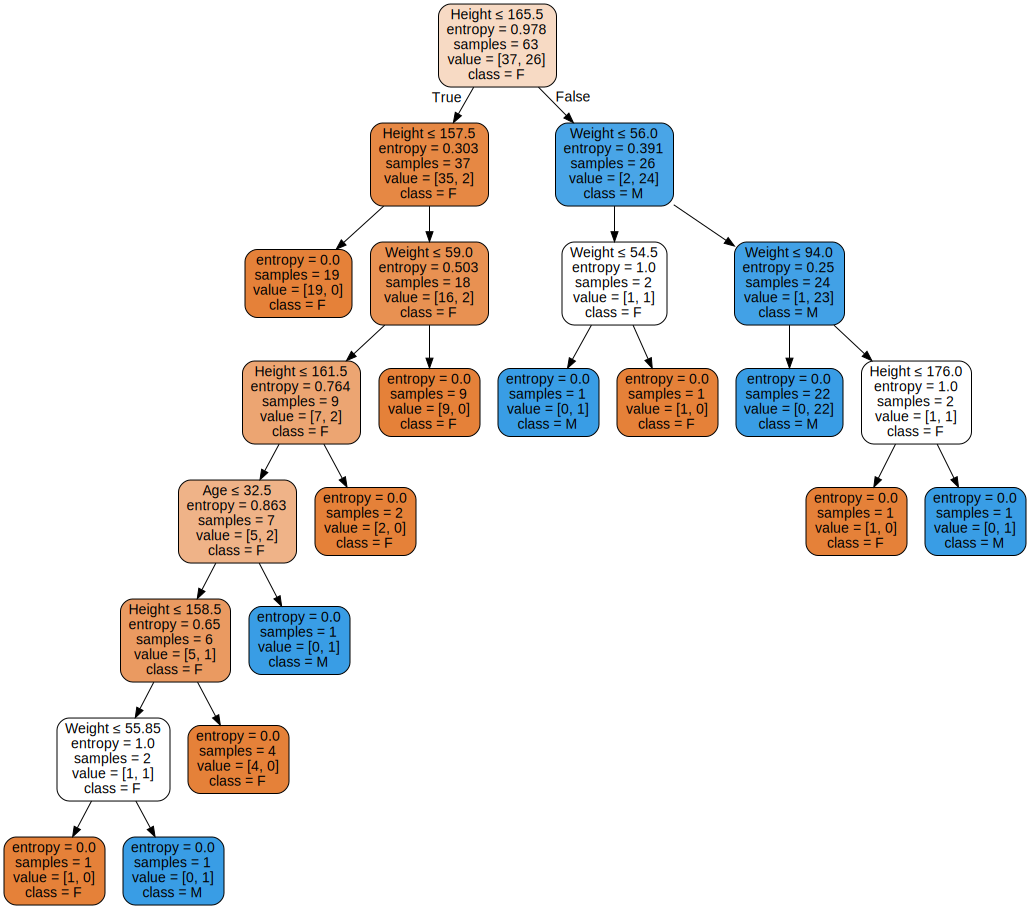

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Demog") 
dot_data = tree.export_graphviz(model, out_file=None, 
                     feature_names=generalAttrs,  
                     class_names=['F','M'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 